In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

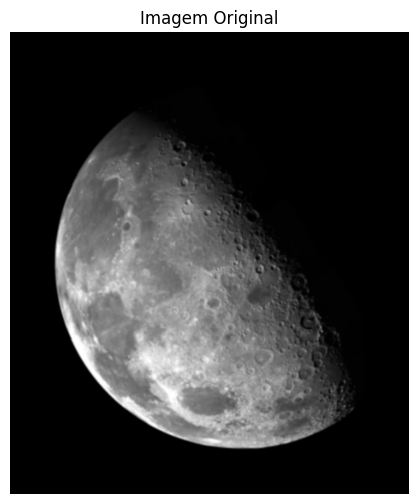

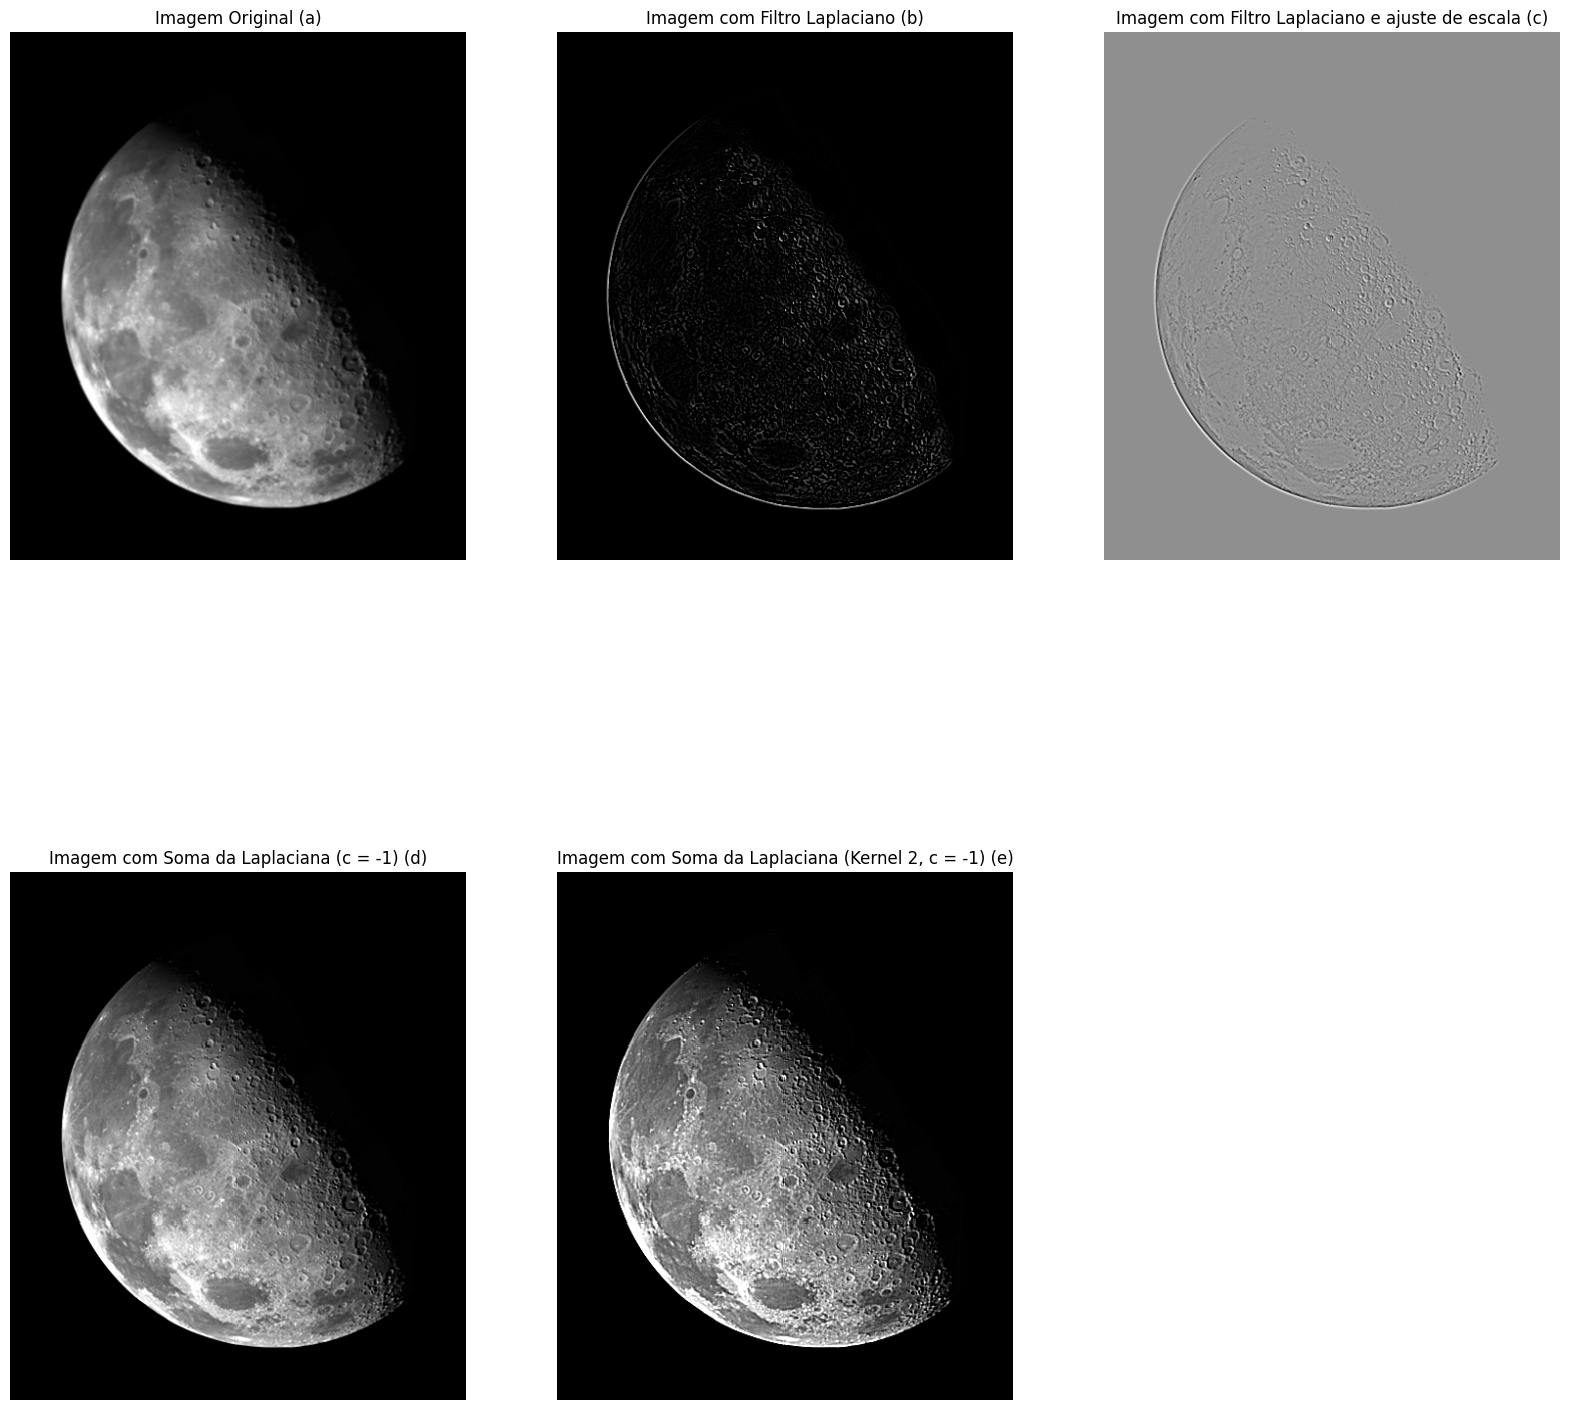

In [78]:
# Reproduzindo a imagem 3.38 do livro

# Carregando a imagem
Im = cv2.imread('Images/Fig0338(a)(blurry_moon).tif', cv2.IMREAD_GRAYSCALE)
# Plotando e exportando a imagem original como pdf
plt.figure(figsize=(6,6))
plt.title('Imagem Original')
plt.imshow(Im, cmap = 'gray')
plt.axis('off')
plt.savefig('Images/Fig0338a_original.pdf')
plt.show()

Im = Im.astype(np.float64)
# Para reproduzir a imagem do livro, precisamos implementar uma mascara laplaciana

# Definindo o kernel laplaciano
kernel_1 = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

kernel_2 = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]])

# Função para aplicar o filtro laplaciano
def laplacian_filter(image, kernel):
    filtered_image = np.zeros_like(image)

    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            region = image[i-1:i+2, j-1:j+2]
            filtered_value = np.sum(region * kernel)
            filtered_image[i, j] = filtered_value

    return filtered_image  

# Função para normalizar a imagem
def normalize_image(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized_image = (image - min_val) * 255 / (max_val - min_val)
    return normalized_image

# Aplicando o filtro laplaciano
Sharped_Im = laplacian_filter(Im, kernel_1)
Sharped_Plot_Im = np.clip(Sharped_Im, 0, 255)

# Normalizando a imagem resultante
Normalized_Sharped_Im = normalize_image(Sharped_Im)

# Utilizando um c = -1 para somar a laplaciana à imagem original
c = -1
Added_Im = Im + c * Sharped_Im
Added_Im = np.clip(Added_Im, 0, 255)

# Aplicando o filtro laplaciano com o segundo kernel
Sharped_Im2 = laplacian_filter(Im, kernel_2)
Added_Im2 = Im + c * Sharped_Im2
Added_Im2 = np.clip(Added_Im2, 0, 255)

plt.figure(figsize=(20,20))
plt.subplot(2, 3, 1)
plt.title('Imagem Original (a)')
plt.imshow(Im, cmap = 'gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Imagem com Filtro Laplaciano (b)')
plt.imshow(Sharped_Plot_Im, cmap = 'gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Imagem com Filtro Laplaciano e ajuste de escala (c)')
plt.imshow(Normalized_Sharped_Im, cmap = 'gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Imagem com Soma da Laplaciana (c = -1) (d)')
plt.imshow(Added_Im, cmap = 'gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Imagem com Soma da Laplaciana (Kernel 2, c = -1) (e)')
plt.imshow(Added_Im2, cmap = 'gray')
plt.axis('off')
# exportando o plot das imagens como pdf
plt.savefig('Images/Fig0338_results.pdf')
plt.show()




